In [21]:
import pandas as pd
import utils
import numpy

In [22]:
DISPLAY_SIZE = (1920,1080)

In [23]:
#----------------------------------------------------------------------------------------
#
#
# 1. Fixations plots
#
#
#----------------------------------------------------------------------------------------

In [24]:
# Read gaze data with events using pandas library
data = pd.read_csv("data/gazeDataWithAOIsAndEvents.csv")
# set display.max_columns to none, to show all the columns when using head()
pd.set_option('display.max_columns', None)

In [25]:
# Preview data
data.head()

Row                 Respondent  Age Gender    Group Calibration  Timestamp  \
0    2  Anonymous 14-11-22 09h35m    0  OTHER  Default   Excellent   128.9448   
1    4  Anonymous 14-11-22 09h35m    0  OTHER  Default   Excellent   137.2724   
2    5  Anonymous 14-11-22 09h35m    0  OTHER  Default   Excellent   145.6203   
3    6  Anonymous 14-11-22 09h35m    0  OTHER  Default   Excellent   153.9470   
4    7  Anonymous 14-11-22 09h35m    0  OTHER  Default   Excellent   162.2703   

  SourceStimuliName  EventSource.1  ET_TimeSignal  ET_CameraLeftX  \
0               img              1        141.658          0.5989   
1               img              1        149.984          0.5991   
2               img              1        158.333          0.5990   
3               img              1        166.660          0.5989   
4               img              1        174.983          0.5991   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0          0.5257           0.4298           0.5191                0   
1          0.5255           0.4300           0.5190                0   
2          0.5253              NaN              NaN                0   
3          0.5252           0.4299           0.5187                0   
4          0.5251           0.4301           0.5187                0   

   ET_ValidityRight  GazeX  GazeY  Paragraph1  Paragraph2  Paragraph3  \
0                 0  960.5  494.5           0           0           0   
1                 0  952.0  509.5           0           0           0   
2                 4  938.0  500.0           0           0           0   
3                 0  948.0  499.0           0           0           0   
4                 0  969.5  515.0           0           0           0   

   Paragraph4  Paragraph5  Paragraph6  Text_Area  SubFigure1  SubFigure2  \
0           1           0           0          1           0           0   
1           1           0           0          1           0           0   
2           1           0           0          1           0           0   
3           1           0           0          1           0           0   
4           1           0           0          1           0           0   

   SubFigure3  Figure  Formula  InterpolatedGazeX  InterpolatedGazeY  \
0           0       0        0              960.5              494.5   
1           0       0        0              952.0              509.5   
2           0       0        0              938.0              500.0   
3           0       0        0              948.0              499.0   
4           0       0        0              969.5              515.0   

   InterpolatedDistance  GazeVelocityAngle  FixID  Fixation Index by Stimulus  \
0              567.9688                NaN    NaN                         NaN   
1              567.9048            27.4655    1.0                         NaN   
2              566.2654            13.3622    1.0                         NaN   
3              567.7859            41.4435    1.0                         NaN   
4              567.7856            36.3849    1.0                         NaN   

   Fixation X  Fixation Y  Fixation Start  Fixation End  Fixation Duration  \
0         NaN         NaN             NaN           NaN                NaN   
1     947.656    491.5955        133.1086       358.082           224.9734   
2     947.656    491.5955        133.1086       358.082           224.9734   
3     947.656    491.5955        133.1086       358.082           224.9734   
4     947.656    491.5955        133.1086       358.082           224.9734   

   Fixation Dispersion  ET_PupilLeft  GazeAccelerationAngle  ET_PupilRight  \
0                  NaN           NaN                    NaN            NaN   
1               0.3205           NaN                    NaN            NaN   
2               0.3205        2.6143             -1689.4409            NaN   
3               0.3205           NaN              3372.4442            

In [26]:
# Derive a dataframe with fixation data only
# Keep only relevant colomns
fixationData = data[['Respondent','FixID',
       'Fixation X', 'Fixation Y',
       'Fixation Duration']].copy(deep=True)

# Since the same fixation is assigned to multiple gazes, it is necessary to drop duplicates
fixationData = fixationData.drop_duplicates()

# Then, it is necessary to drop rows with no FixID
fixationData = fixationData.dropna(subset=['FixID'])

# Reset the index of the dataframe
# to do: remove old index
fixationData = fixationData.reset_index(drop=True)

In [27]:
# Preview fixationData
fixationData.head()

Respondent  FixID  Fixation X  Fixation Y  Fixation Duration
0  Anonymous 14-11-22 09h35m    1.0    947.6560    491.5955           224.9734
1  Anonymous 14-11-22 09h35m    2.0    460.5417    172.5694           150.0168
2  Anonymous 14-11-22 09h35m    3.0    214.2487    168.4102           116.6633
3  Anonymous 14-11-22 09h35m    4.0    210.2339    200.2500           258.2971
4  Anonymous 14-11-22 09h35m    5.0    288.8370    189.2826           191.6533

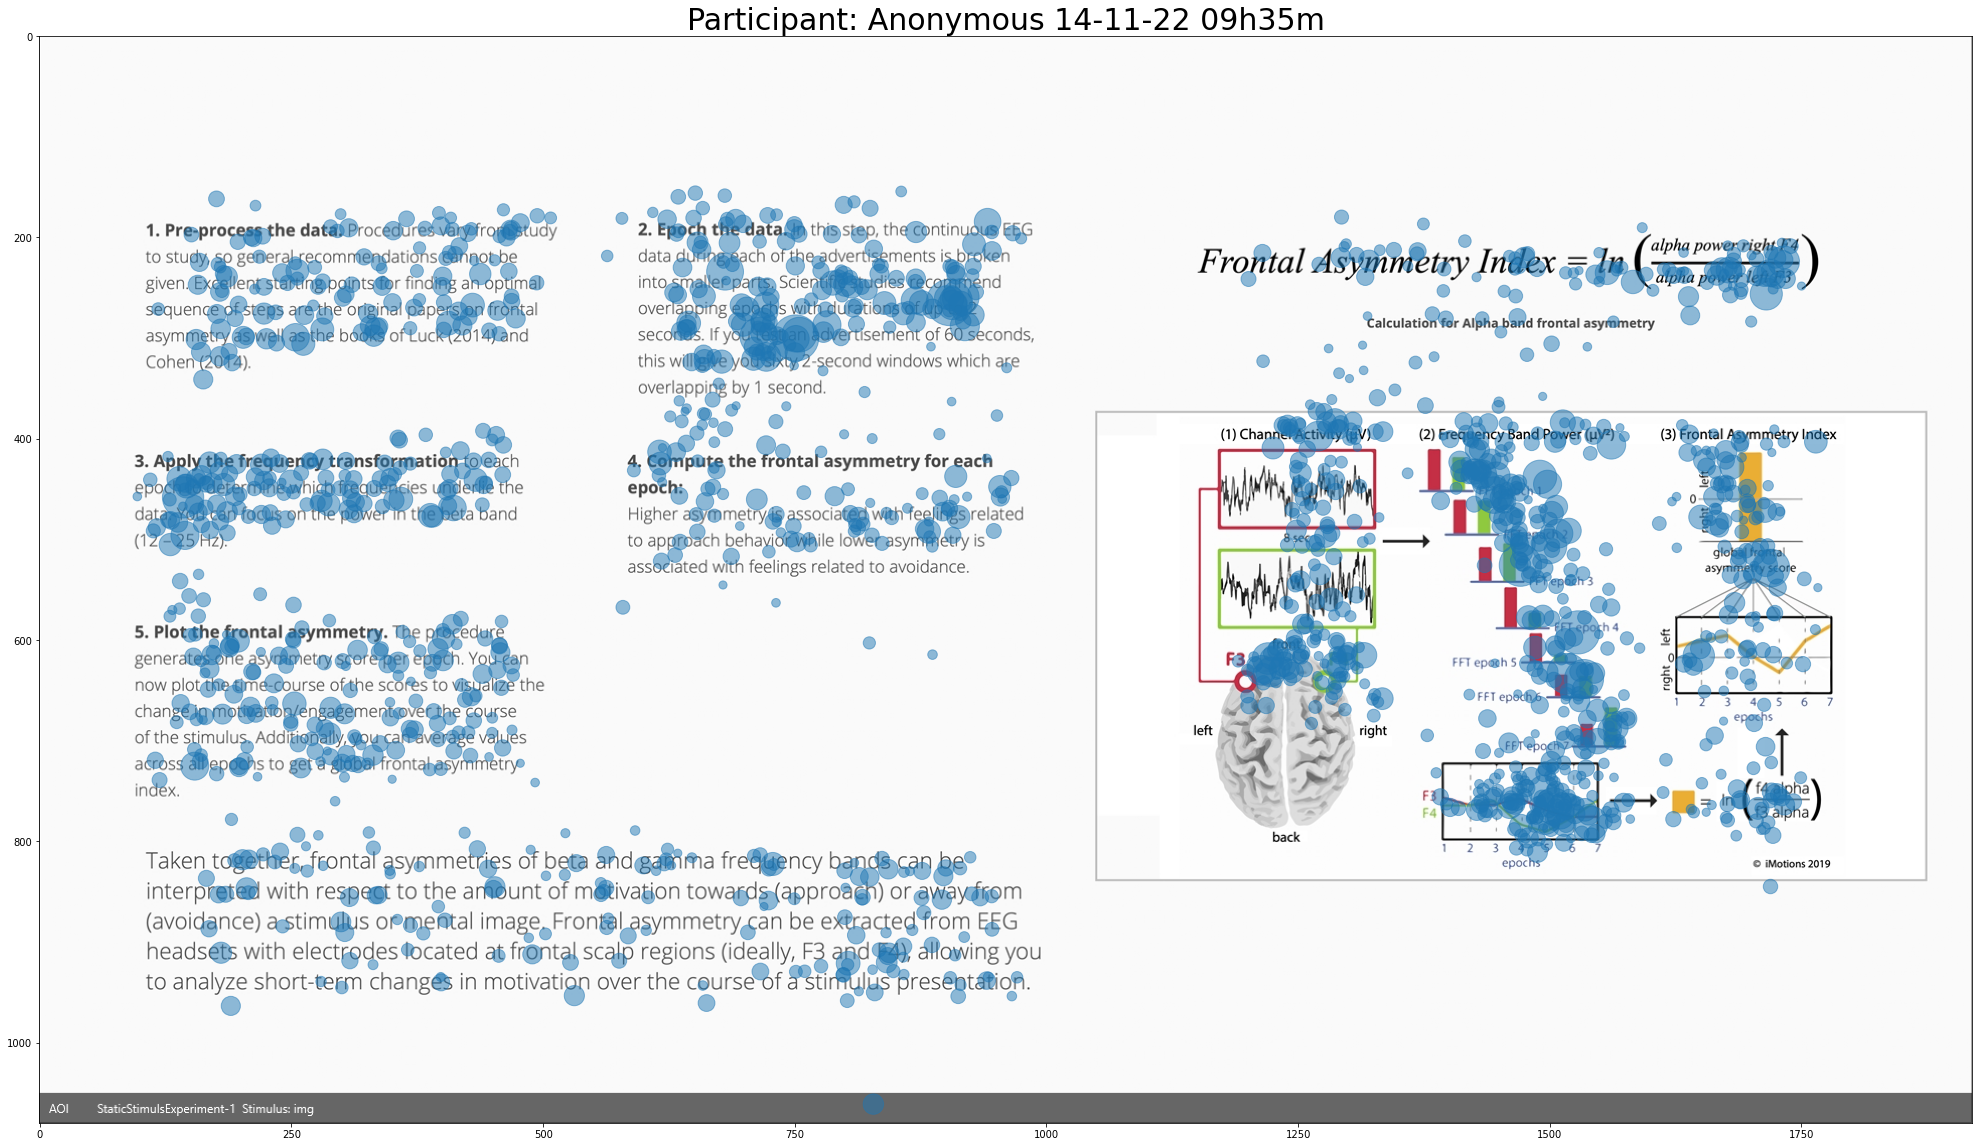

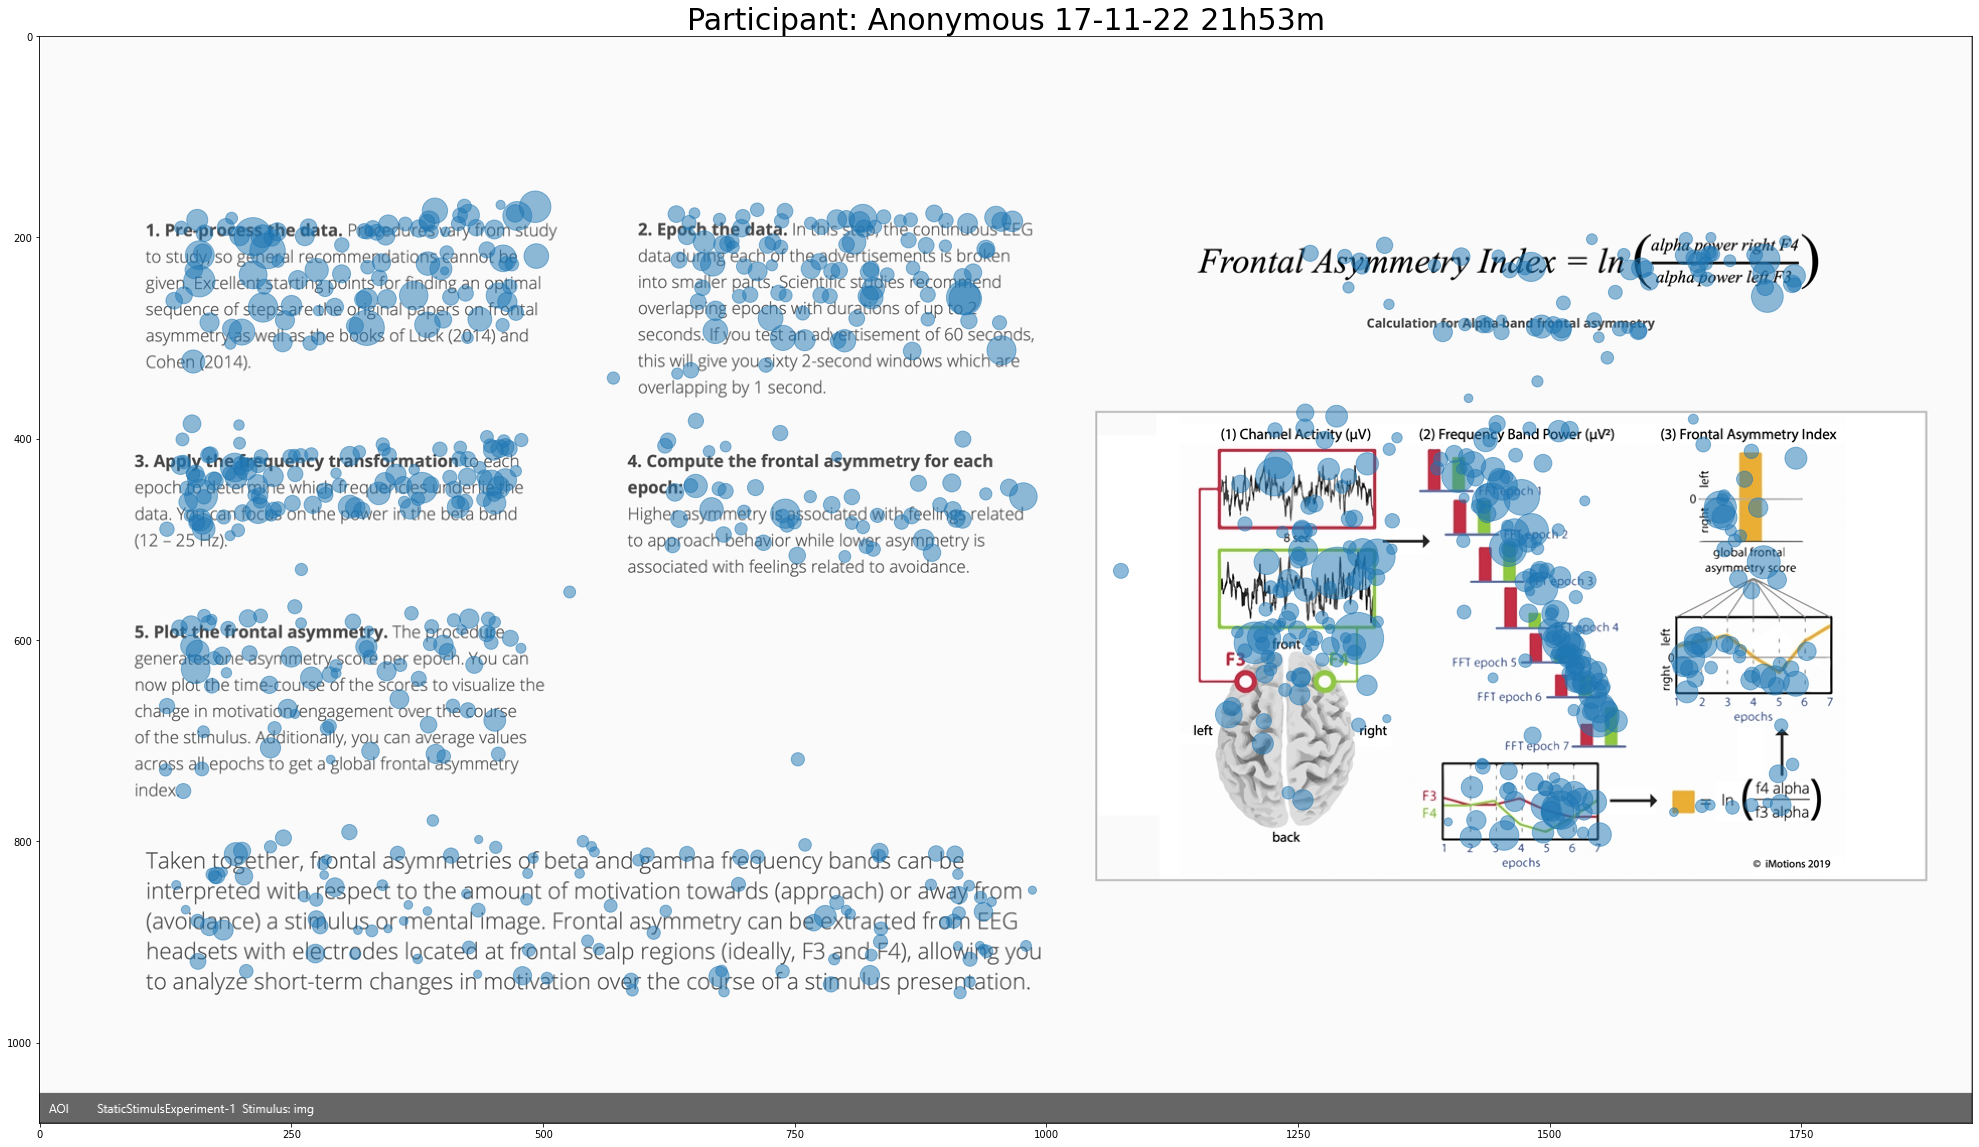

In [28]:
# Plot fixations

# Iteratate over the participants and plot fixations for each participant
for participant in fixationData['Respondent'].unique():
    
    # filter in the participant data
    participantFixationData= fixationData[fixationData['Respondent']==participant].copy(deep=True)
    
    # Initiate a coordinate system with a background image
    fig, ax = utils.initPlotContainer("data/stimulus.png")
    
    # set title
    ax.set_title(f'Participant: {participant}', fontsize=30)
    
    # plot fixations (with the size of the markers relative to the fixation duration)
    ax.scatter(participantFixationData["Fixation X"], participantFixationData["Fixation Y"], s= participantFixationData["Fixation Duration"], alpha=0.5)
    

In [29]:
#----------------------------------------------------------------------------------------
#
#
# 2. Scan-path plots
#
#
#----------------------------------------------------------------------------------------

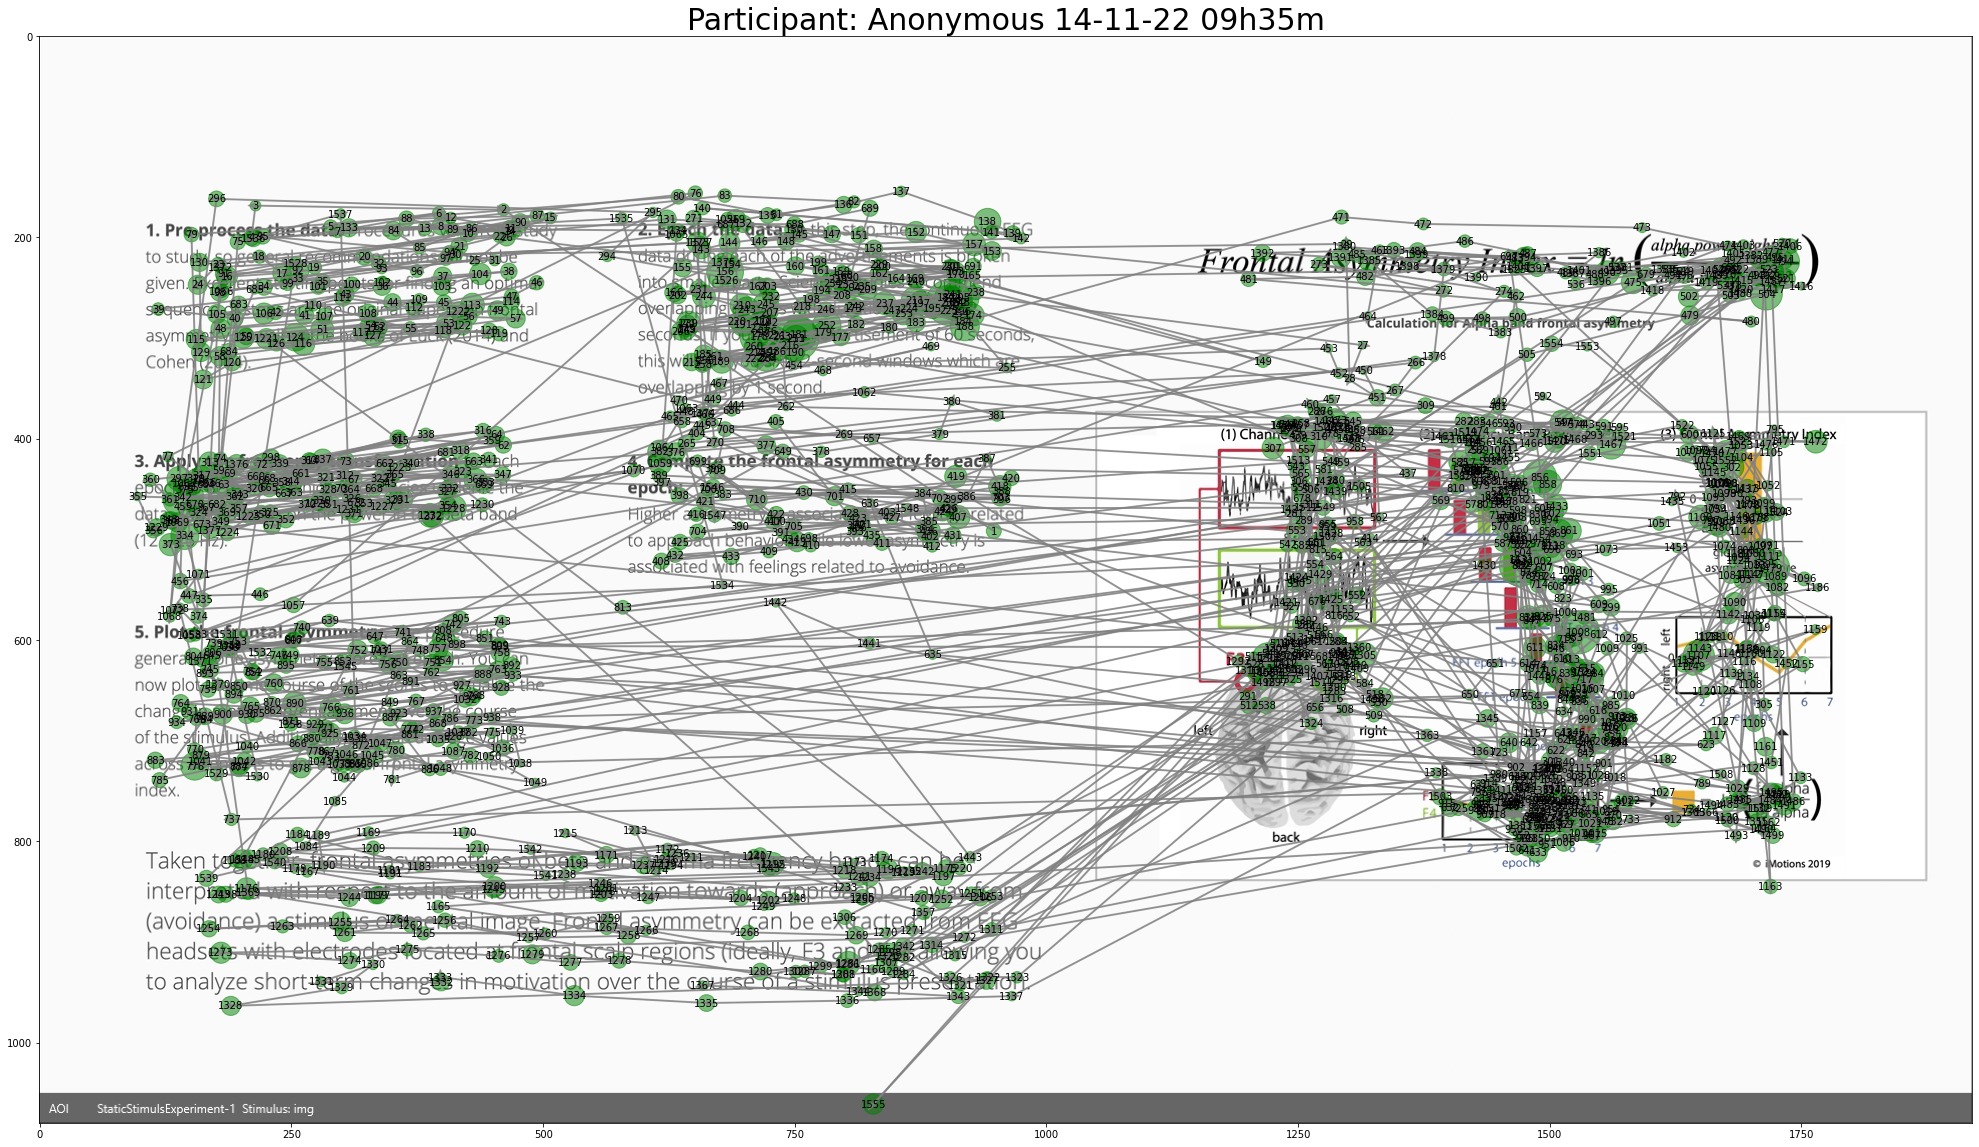

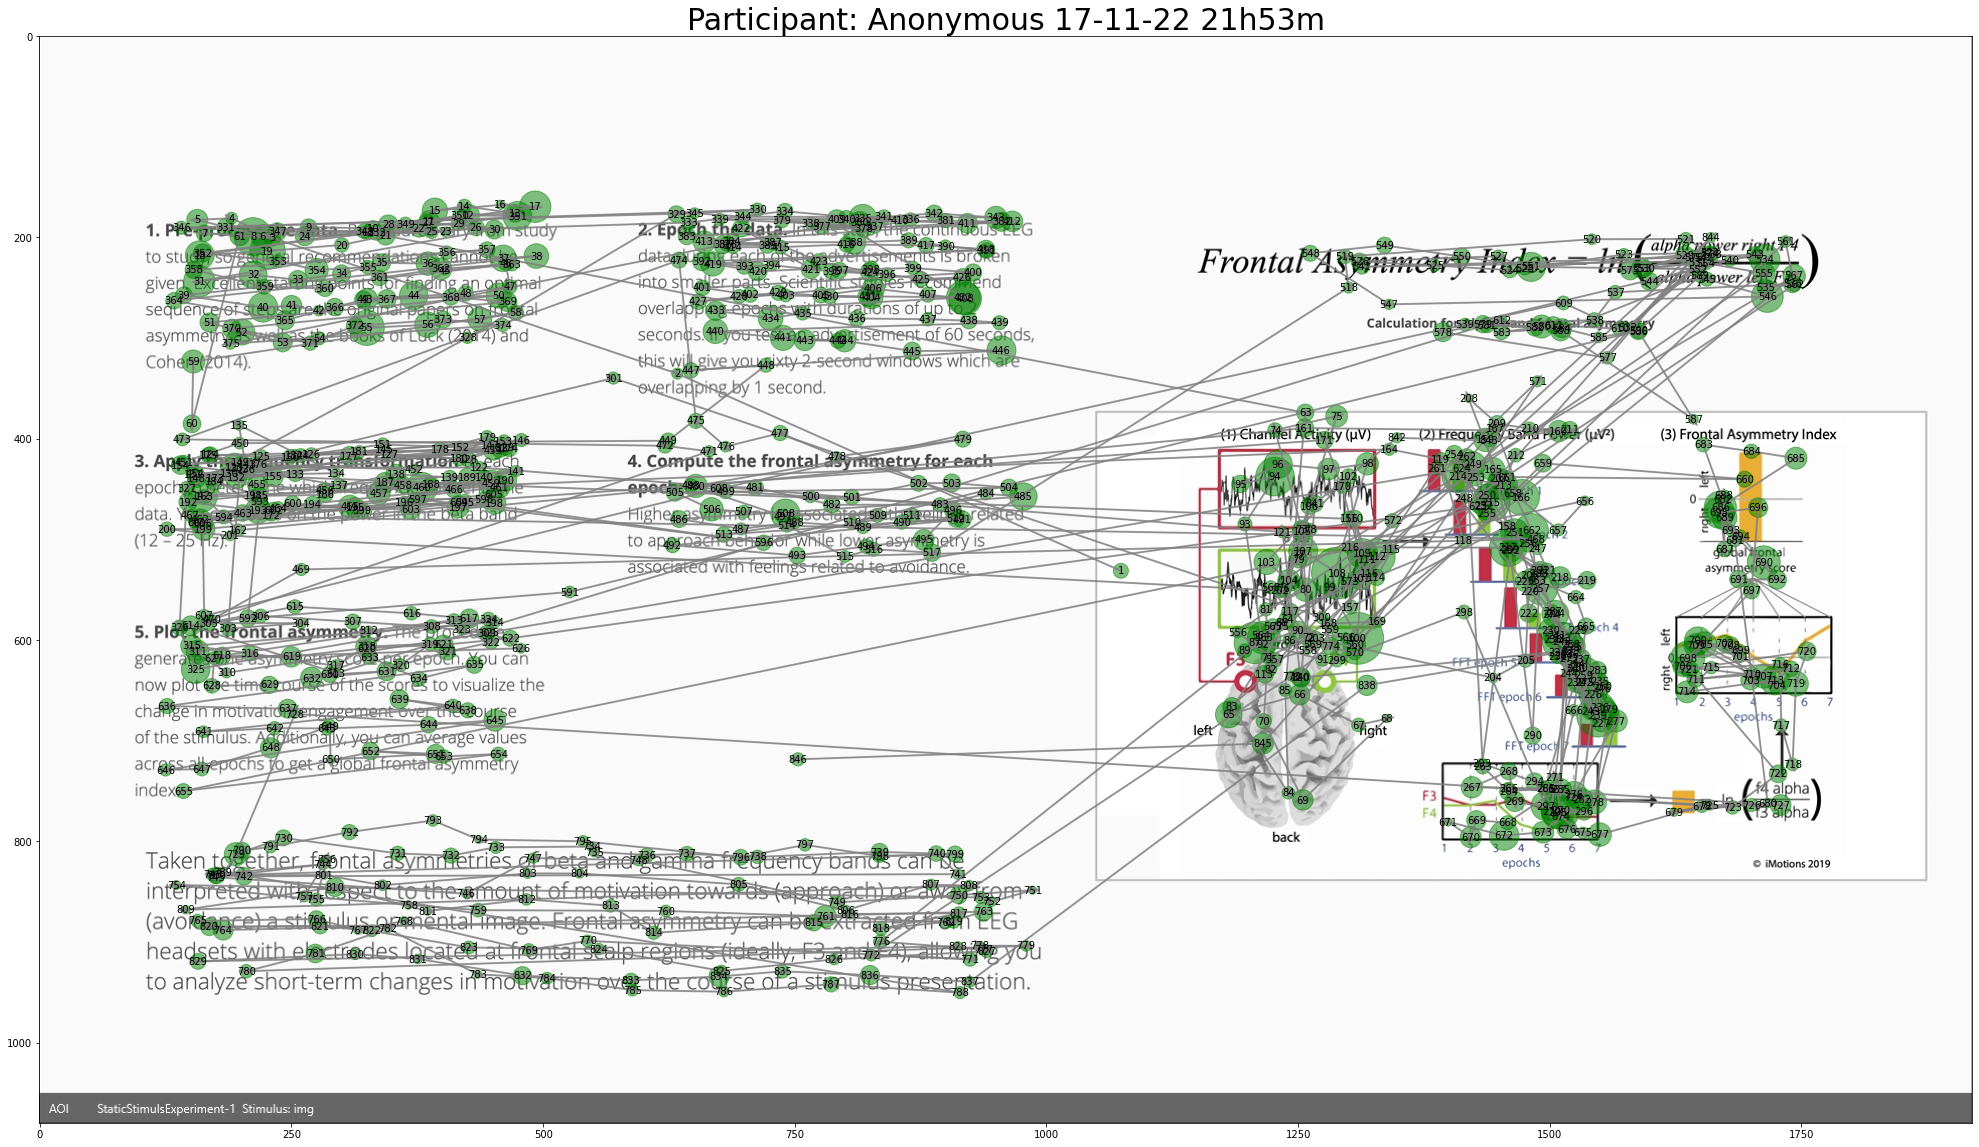

In [30]:
# Iteratate over the participants and plot the scan-path for each participant
for participant in fixationData['Respondent'].unique():
    
    # filter in the participant data
    participantFixationData= fixationData[fixationData['Respondent']==participant].copy(deep=True)
    participantFixationData = participantFixationData.reset_index(drop=True)

    # Initiate a coordinate system with a background image
    fig, ax = utils.initPlotContainer("data/stimulus.png")
    
    # set title
    ax.set_title(f'Participant: {participant}', fontsize=30)
    
    # get the length of the fixations dataframe
    fixationsDataFrameLength = len(participantFixationData)

    # plot fixations (with the size of the markers relative to the fixation duration)
    ax.scatter(participantFixationData["Fixation X"], participantFixationData["Fixation Y"], s= participantFixationData["Fixation Duration"], c='green', alpha=0.5)

    # iterate through fixationData
    for index, row in participantFixationData.iterrows():
        # assign an incremental number to each fixation      
        ax.annotate(str(index+1), (row['Fixation X'],row['Fixation Y']), alpha=1, horizontalalignment='center', verticalalignment='center', multialignment='center')
        # connect consecutive pairs of fixations with edges  
        if index<fixationsDataFrameLength-1:
            ax.arrow(row['Fixation X'],row['Fixation Y'], participantFixationData.iloc[index+1]['Fixation X']-row['Fixation X'],participantFixationData.iloc[index+1]['Fixation Y']-row['Fixation Y'], fc='grey', ec='grey', alpha=.7, fill=True, shape='full', width=1, head_width=5, head_starts_at_zero=False, overhang=0)

In [31]:
#----------------------------------------------------------------------------------------
#
#
# 2. Heatmap plots
#
#
#----------------------------------------------------------------------------------------

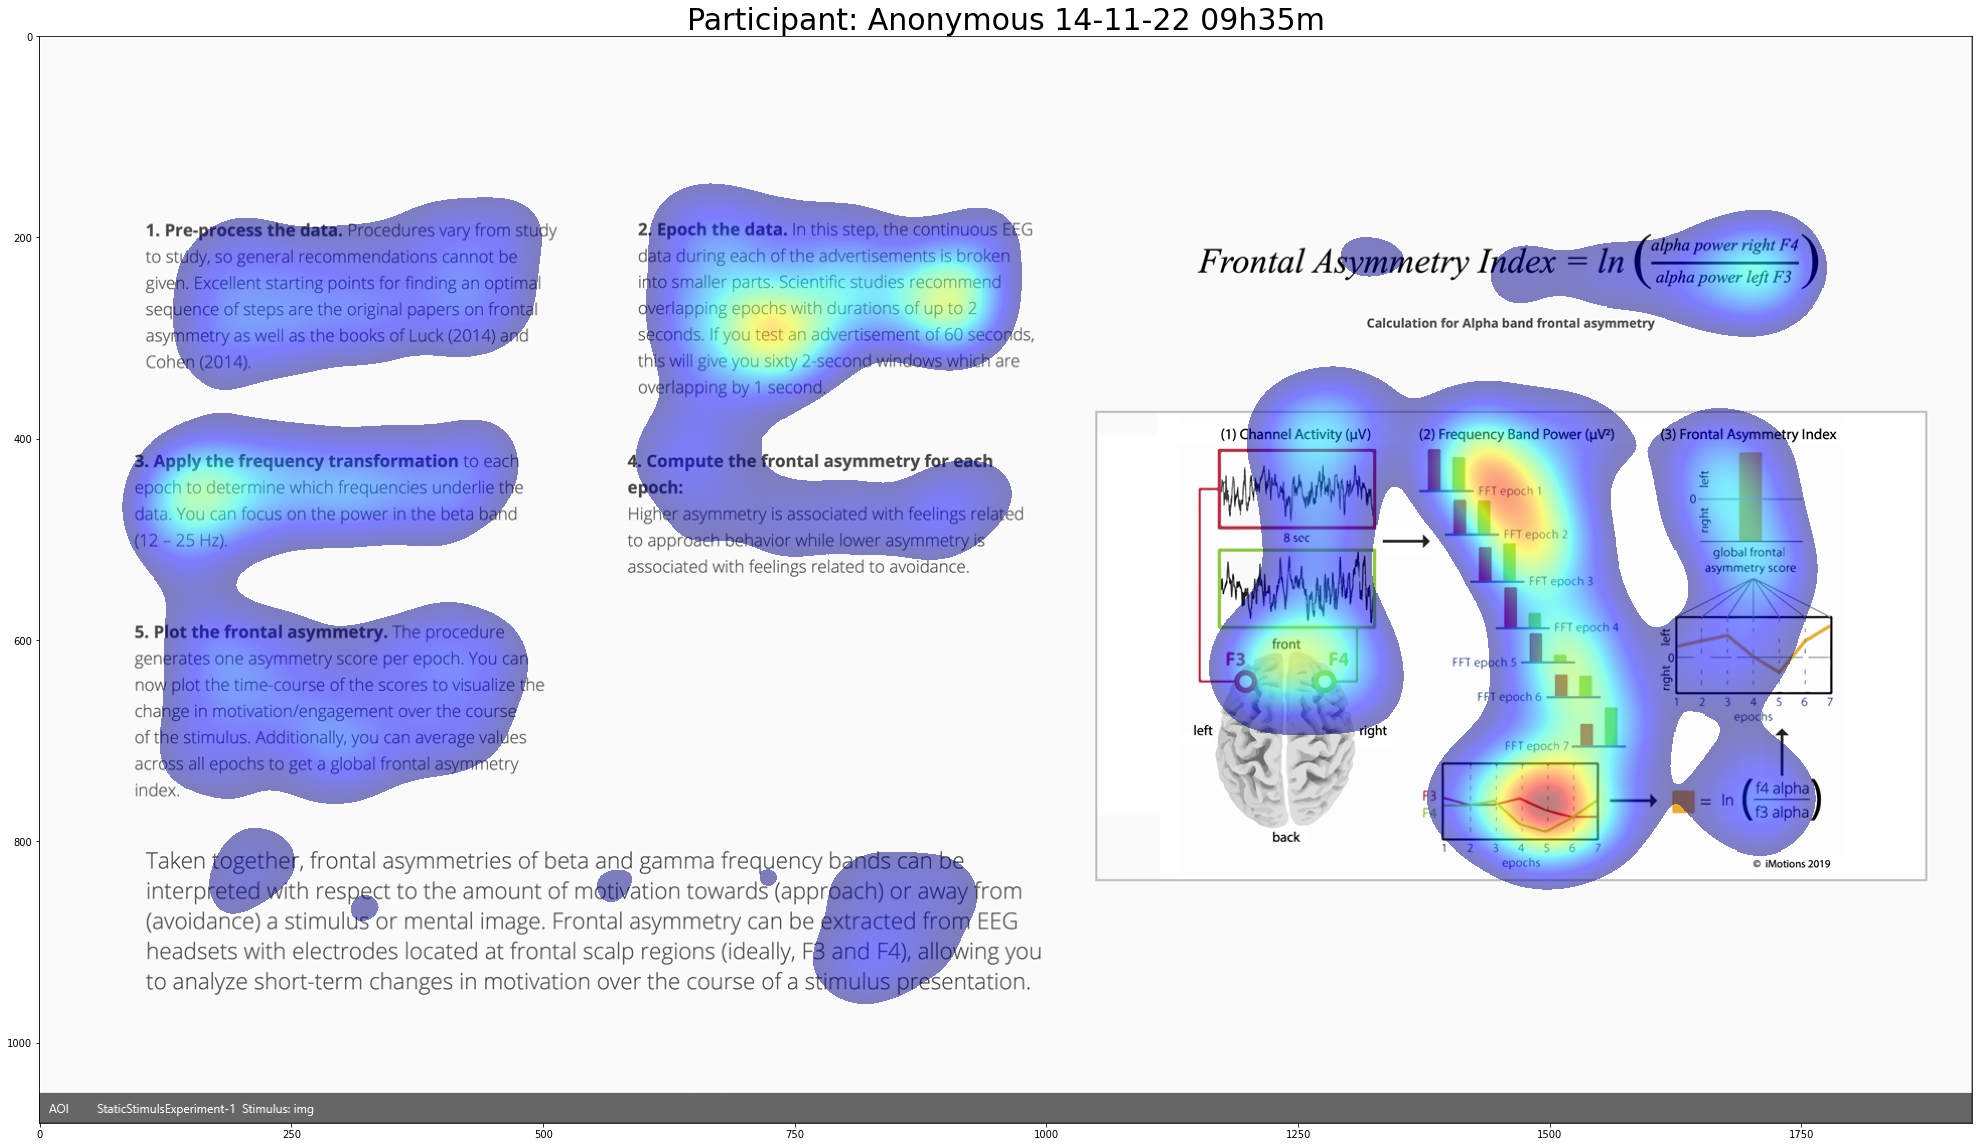

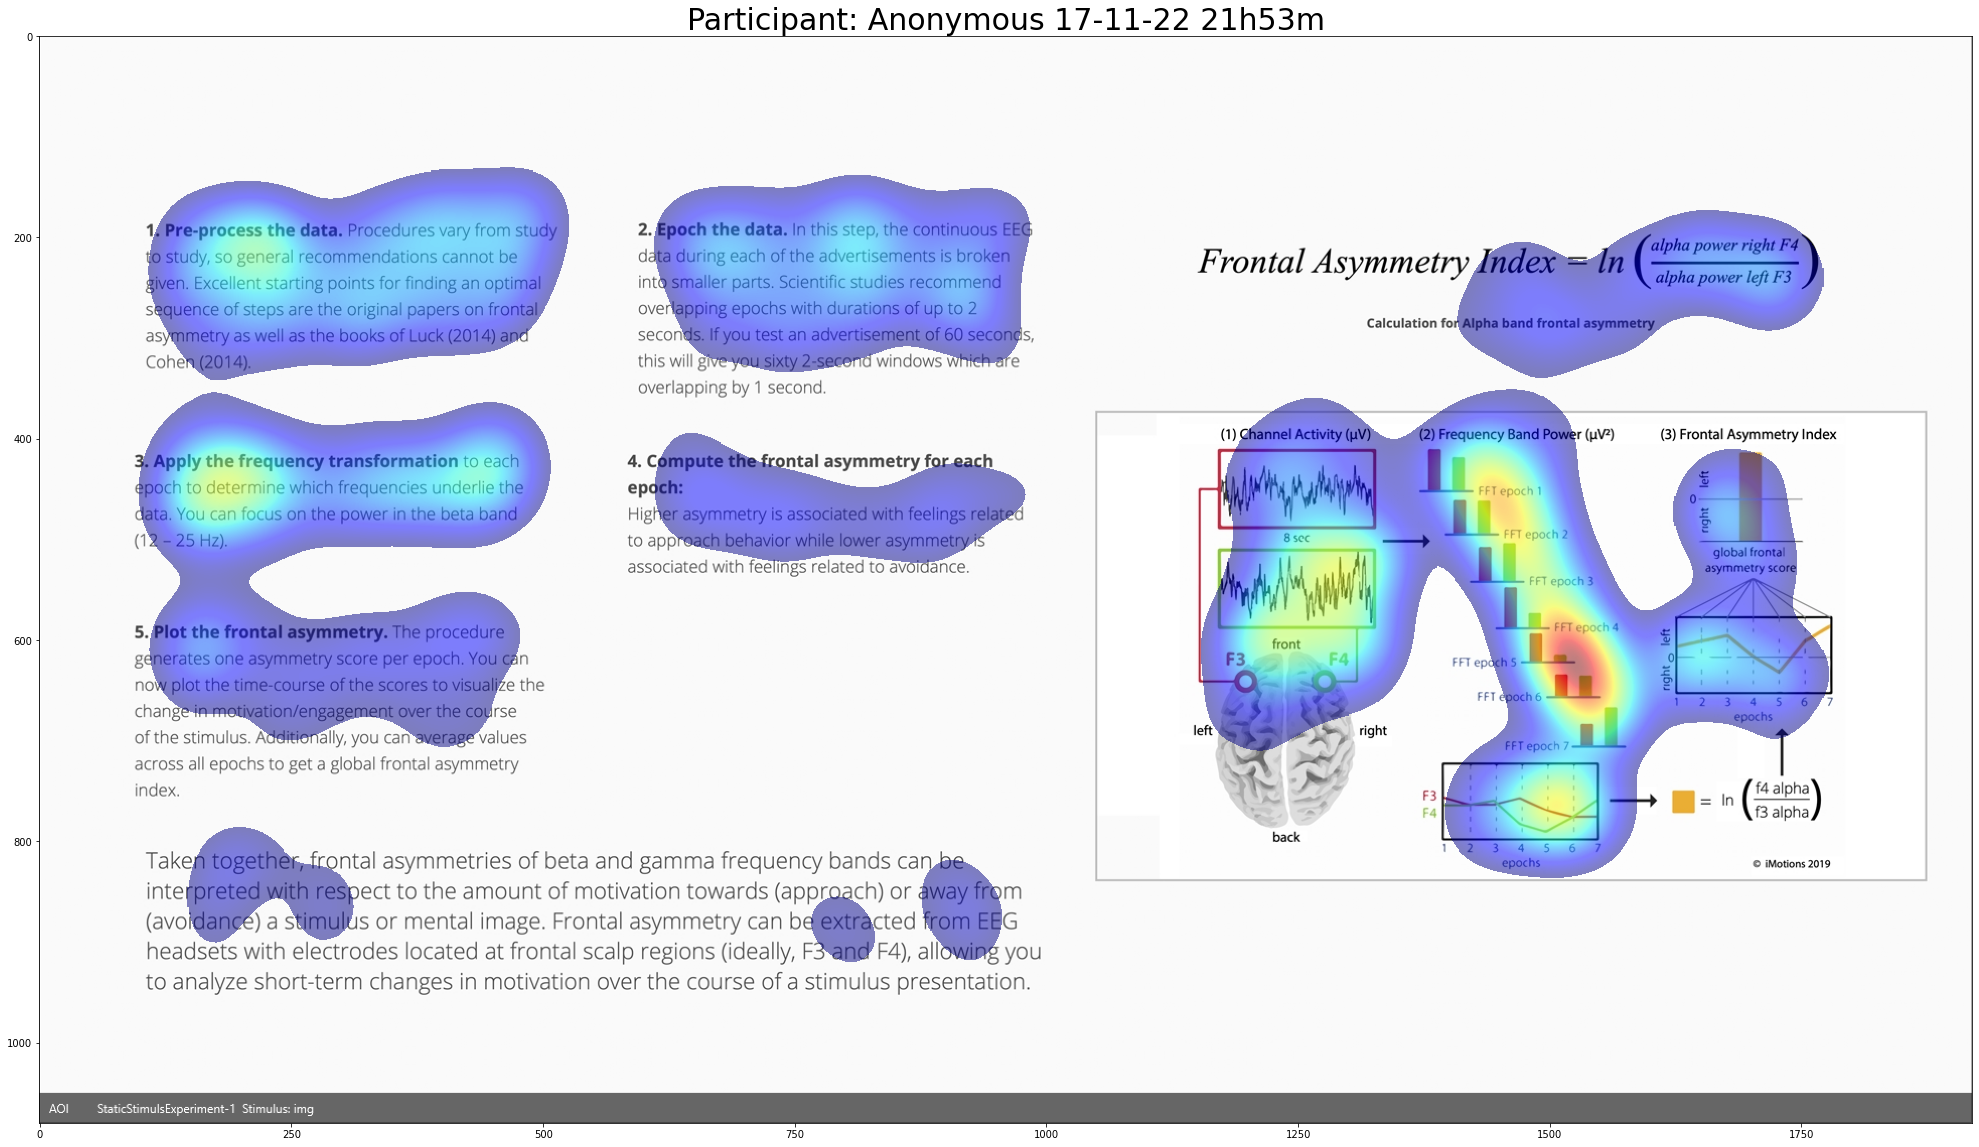

In [32]:
# Iteratate over the participants and plot the heatmap for each participant
for participant in fixationData['Respondent'].unique():
    
    # filter in the participant data
    participantFixationData= fixationData[fixationData['Respondent']==participant]
    
    # Initiate a coordinate system with a background image
    fig, ax = utils.initPlotContainer("data/stimulus.png")
    
    # set title
    ax.set_title(f'Participant: {participant}', fontsize=30)

    # Gaussian settings
    gwh = 200
    gsdwh = gwh/6
    gaus = utils.gaussian(gwh,gsdwh)

    strt = int(gwh/2)
    heatmapsize = int(DISPLAY_SIZE[1] + 2*strt), int(DISPLAY_SIZE[0] + 2*strt)
    heatmap = numpy.zeros(heatmapsize, dtype=float)

    # create heatmap (adapted from PyGazeAnalyser https://github.com/esdalmaijer/PyGazeAnalyser/)
    for index, row in participantFixationData.iterrows():
        # get x and y coordinates of fixations
        # x and y - indices of heatmap array. must be integers
        x = strt + int(row['Fixation X']) - int(gwh/2)
        y = strt + int(row['Fixation Y']) - int(gwh/2)
        # correct Gaussian size if either coordinate falls outside of
        # display boundaries
        if (not 0 < x < DISPLAY_SIZE[0]) or (not 0 < y < DISPLAY_SIZE[1]):
            hadj=[0,gwh];vadj=[0,gwh]
            if 0 > x:
                hadj[0] = abs(x)
                x = 0
            elif DISPLAY_SIZE[0] < x:
                hadj[1] = gwh - int(x-DISPLAY_SIZE[0])
            if 0 > y:
                vadj[0] = abs(y)
                y = 0
            elif DISPLAY_SIZE[1] < y:
                vadj[1] = gwh - int(y-DISPLAY_SIZE[1])
            # add adjusted Gaussian to the current heatmap
            try:
                heatmap[y:y+vadj[1],x:x+hadj[1]] += gaus[vadj[0]:vadj[1],hadj[0]:hadj[1]] * row['Fixation Duration']
            except:
                # fixation was probably outside of display
                pass
        else:				
            # add Gaussian to the current heatmap
            heatmap[y:y+gwh,x:x+gwh] += gaus * row['Fixation Duration']

    # resize heatmap
    heatmap = heatmap[strt:DISPLAY_SIZE[1]+strt,strt:DISPLAY_SIZE[0]+strt]
    # remove zeros
    lowbound = numpy.mean(heatmap[heatmap>0])
    heatmap[heatmap<lowbound] = numpy.NaN
    # draw heatmap on top of image
    ax.imshow(heatmap, cmap='jet', alpha=0.5)
